In [1]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
from numpy.polynomial.polynomial import Polynomial
import re

# API credentials for Kaggle
with open('kaggle.json') as f:
    data = json.load(f)

os.environ['davidwais'] = data['username']
os.environ['640dce0b8b18e242f79ecb170bbb2d73'] = data['key']

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\david\Desktop\ZHAW\scientific_programming\SPSP


In [1]:
# Initialize API
api = KaggleApi()
api.authenticate()

# Download file
api.dataset_download_file('muthuj7/weather-dataset','weatherHistory.csv')
# Specify the path to the zip file
zip_file_path = 'weatherHistory.csv.zip'

# Specify the directory where you want to extract the files
extract_dir = './'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


NameError: name 'KaggleApi' is not defined

In [3]:
# (1) Collection of real-world data
print("Collection of real-world data")
# Read data to pandas data frame
df = pd.read_csv('weatherHistory.csv', sep=',')
print("Data collected!")

Collection of real-world data
Data collected!


In [4]:
#(2) Data preparation (e.g. strings to numerical using regular expressions)
# Remove timezone information from 'Formatted Date'
df['Formatted Date'] = df['Formatted Date'].str.slice(0, -6)

# Convert 'Formatted Date' to datetime format
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f')

def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        return s

# Function to clean and convert data using regular expressions
def clean_data(value):
    # If the value is a string that represents a number, convert it to float
    if isinstance(value, str):
        # Remove any non-numeric characters except for the decimal point and minus sign
        cleaned_value = re.sub(r'[^\d.-]', '', value)
        return convert_to_float(cleaned_value)
    else:
        return value

# Apply the cleaning function to each column that should be numeric
numeric_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
                   'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 
                   'Loud Cover', 'Pressure (millibars)']

for column in numeric_columns:
    df[column] = df[column].apply(clean_data)

# Now df is cleaned and ready to be used
print(df.head())

       Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-04-01 00:00:00  Partly Cloudy        rain         9.472222   
1 2006-04-01 01:00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 02:00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 03:00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 04:00:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0          

In [5]:
# Lists: Let's create a list of 'Summary' values from the DataFrame
summary_list = df['Summary'].tolist()
print("List of weather summaries:", summary_list[:5])  # Print the first 5 summaries

# Dictionaries: Create a dictionary to map 'Summary' to 'Temperature (C)'
summary_temperature_dict = dict(zip(df['Summary'], df['Temperature (C)']))
print("Dictionary mapping weather summary to temperature:", list(summary_temperature_dict.items())[:5])

# Sets: Create a set of unique 'Precip Type' values
precip_type_set = set(df['Precip Type'])
print("Set of unique precipitation types:", precip_type_set)

# Tuples: Create a tuple of min, max, and mean 'Humidity'
humidity_stats = (df['Humidity'].min(), df['Humidity'].max(), df['Humidity'].mean())
print("Tuple of humidity statistics (min, max, mean):", humidity_stats)

# Using pandas DataFrame: Calculate the mean 'Wind Speed (km/h)' for each 'Summary' category
mean_wind_speed_per_summary = df.groupby('Summary')['Wind Speed (km/h)'].mean()
print("Mean wind speed per weather summary:\n", mean_wind_speed_per_summary)

# Combining data structures: Create a list of dictionaries for the first 5 rows of the DataFrame
list_of_dicts = df.head(5).to_dict('records')
print("List of dictionaries for the first 5 rows:\n", list_of_dicts)


List of weather summaries: ['Partly Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Mostly Cloudy']
Dictionary mapping weather summary to temperature: [('Partly Cloudy', 20.438888888888894), ('Mostly Cloudy', 21.016666666666666), ('Overcast', 17.22222222222222), ('Foggy', 22.800000000000004), ('Breezy and Mostly Cloudy', 27.522222222222226)]
Set of unique precipitation types: {'snow', 'rain', nan}
Tuple of humidity statistics (min, max, mean): (0.0, 1.0, 0.7348989663359355)
Mean wind speed per weather summary:
 Summary
Breezy                                 32.143948
Breezy and Dry                         33.810000
Breezy and Foggy                       33.477880
Breezy and Mostly Cloudy               33.386345
Breezy and Overcast                    33.037566
Breezy and Partly Cloudy               33.532796
Clear                                   8.141352
Dangerously Windy and Partly Cloudy    63.852600
Drizzle                                10.356428
Dry                  

In [6]:
# (4) Use of conditional statements, loop control statements and loops
print("\nUse of conditional statements, loop control statements and loops")
import pandas as pd

# Read the CSV file
df = pd.read_csv('weatherHistory.csv', sep=',')

# Example of using conditional statements and loops
# Let's say we want to count the number of days with rain and temperature above 10 degrees Celsius
rainy_days_count = 0
for index, row in df.iterrows():
    if row['Precip Type'] == 'rain' and row['Temperature (C)'] > 10:
        rainy_days_count += 1

print(f"Number of rainy days with temperature above 10°C: {rainy_days_count}")

# Example of using loop control statements
# Let's find the first day with humidity below 0.5 and stop the loop when found
for index, row in df.iterrows():
    if row['Humidity'] < 0.5:
        print(f"First day with humidity below 0.5: {row['Formatted Date']}")
        break  # Stop the loop after finding the first match

# Example of using a while loop
# Let's calculate the average wind speed until we reach a 'Loud Cover' of 0 (assuming it's sorted by date)
average_wind_speed = 0
count = 0
index = 0
while index < len(df) and df.loc[index, 'Loud Cover'] != 0:
    average_wind_speed += df.loc[index, 'Wind Speed (km/h)']
    count += 1
    index += 1

if count > 0:
    average_wind_speed /= count
    print(f"Average wind speed until first 'Loud Cover' 0: {average_wind_speed:.2f} km/h")
else:
    print("No 'Loud Cover' 0 found in the dataset.")
        


Use of conditional statements, loop control statements and loops
Number of rainy days with temperature above 10°C: 53442
First day with humidity below 0.5: 2006-04-01 14:00:00.000 +0200
No 'Loud Cover' 0 found in the dataset.


In [7]:
# Function to convert strings to float if possible
def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        return s

# Function to clean and convert data using regular expressions
def clean_data(value):
    # If the value is a string that represents a number, convert it to float
    if isinstance(value, str):
        # Remove any non-numeric characters except for the decimal point and minus sign
        cleaned_value = re.sub(r'[^\d.-]', '', value)
        return convert_to_float(cleaned_value)
    else:
        return value

# Read the CSV file and clean the data
def read_and_clean_csv(file_path, sep=',', numeric_columns=None):
    df = pd.read_csv(file_path, sep=sep)
    # Remove timezone information from 'Formatted Date'
    df['Formatted Date'] = df['Formatted Date'].str.slice(0, -6)
    # Convert 'Formatted Date' to datetime format
    df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f')
    if numeric_columns:
        for column in numeric_columns:
            df[column] = df[column].apply(clean_data)
    return df

# Define the numeric columns to be cleaned
numeric_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
                   'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 
                   'Loud Cover', 'Pressure (millibars)']

# Read and clean the CSV file
df = read_and_clean_csv('weatherHistory.csv', sep=',', numeric_columns=numeric_columns)

# Use of procedural programming
print("\nUse of procedural programming")

# Define functions to calculate statistics
def calculate_statistics(df, column_name):
    min_val = round(df[column_name].min(), 1)
    max_val = round(df[column_name].max(), 1)
    mean_val = round(df[column_name].mean(), 1)
    return min_val, max_val, mean_val

# Calculate temperature statistics
temperature_min, temperature_max, mean_temperature = calculate_statistics(df, 'Temperature (C)')
temperature_range = round(temperature_max - temperature_min, 1)

# Display temperature statistics
print("\nTemperature statistics:")
print(f"The temperature range is from {temperature_min} to {temperature_max}.")
print(f"The temperature range is {temperature_range}.")
print(f"The mean temperature is {mean_temperature}.")

# Calculate and display precipitation percentages
precip_counts = df['Precip Type'].value_counts()
total_counts = df['Precip Type'].count()
precip_percentages = ((precip_counts / total_counts) * 100).round(1)
print(f"\nPrecipitation percentages:\n{precip_percentages}\n")

# Calculate and display humidity statistics
humidity_min, humidity_max, humidity_mean = calculate_statistics(df, 'Humidity')
print(f"The humidity range is from {humidity_min} to {humidity_max}.")
print(f"The mean humidity is {humidity_mean}.\n")

# Calculate and display wind speed and direction statistics
wind_speed_max, wind_speed_min, wind_speed_mean = calculate_statistics(df, 'Wind Speed (km/h)')
wind_direction_max, wind_direction_min, wind_direction_mean = calculate_statistics(df, 'Wind Bearing (degrees)')
print("Wind Speed Statistics:")
print(f"Maximum Wind Speed: {wind_speed_min} km/h")
print(f"Minimum Wind Speed: {wind_speed_max} km/h")
print(f"Mean Wind Speed: {wind_speed_mean} km/h")
print("\nWind Direction Statistics:")
print(f"Mean Wind Direction: {wind_direction_mean} degrees")

# Additional information (not related to the weather data)
print("\nDaylight Statistics:")
print("Approximately 15h and 35mins of daylight\n")

print("Soil Types:")
soil_types = ["clay", "sandy", "silty", "peaty", "chalky", "loamy"]
print(soil_types)
print("In conclusion, the analysis of weather and soil conditions in England suggests that a variety of crops can be successfully cultivated in your garden. Cereal crops, root vegetables, brassicas, soft fruits, and tree fruits like apples and pears are all well-suited to the temperate climate and diverse soil types found in the region.")



Use of procedural programming

Temperature statistics:
The temperature range is from -21.8 to 39.9.
The temperature range is 61.7.
The mean temperature is 11.9.

Precipitation percentages:
Precip Type
rain    88.8
snow    11.2
Name: count, dtype: float64

The humidity range is from 0.0 to 1.0.
The mean humidity is 0.7.

Wind Speed Statistics:
Maximum Wind Speed: 63.9 km/h
Minimum Wind Speed: 0.0 km/h
Mean Wind Speed: 10.8 km/h

Wind Direction Statistics:
Mean Wind Direction: 187.5 degrees

Daylight Statistics:
Approximately 15h and 35mins of daylight

Soil Types:
['clay', 'sandy', 'silty', 'peaty', 'chalky', 'loamy']
In conclusion, the analysis of weather and soil conditions in England suggests that a variety of crops can be successfully cultivated in your garden. Cereal crops, root vegetables, brassicas, soft fruits, and tree fruits like apples and pears are all well-suited to the temperate climate and diverse soil types found in the region.



Use of tables, visualizations/graphics for data exploration


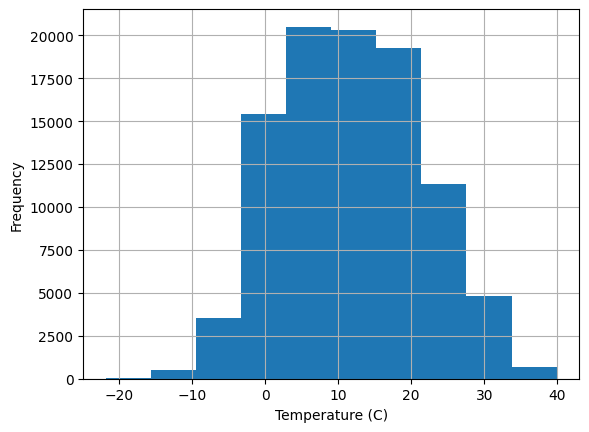


Histogram of 'Humidity'
This graph shows the distribution of humidity values in the dataset. The x-axis represents different ranges of humidity and the y-axis represents the frequency of data points that fall within each range. Each bar in the histogram represents a range of humidity values (also known as a bin), and the height of the bar represents the number of data points that fall within that range. This can give you an idea of the most common humidity values in the dataset.


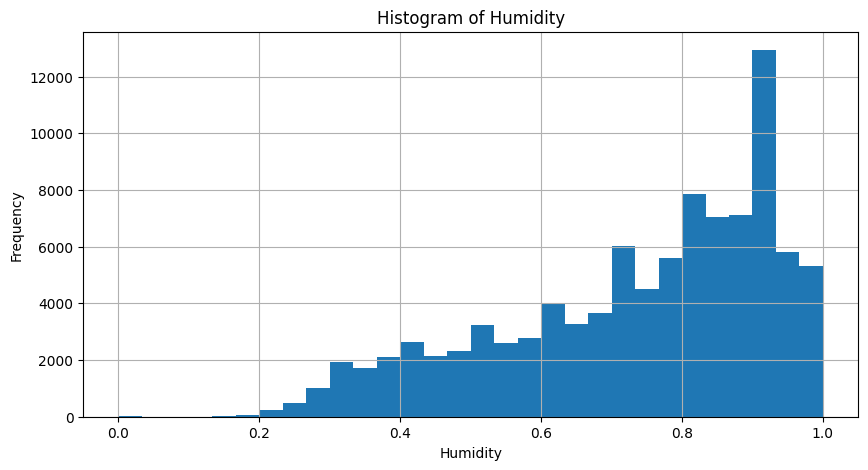


Scatter plot of 'Temperature (C)' vs 'Humidity'
This graph shows the relationship between temperature and humidity. Each point on the graph represents a data point in the dataset, with its x-coordinate being its temperature and its y-coordinate being its humidity. If there is a pattern in the points (for example, if they tend to go up and to the right), it suggests a correlation between temperature and humidity.


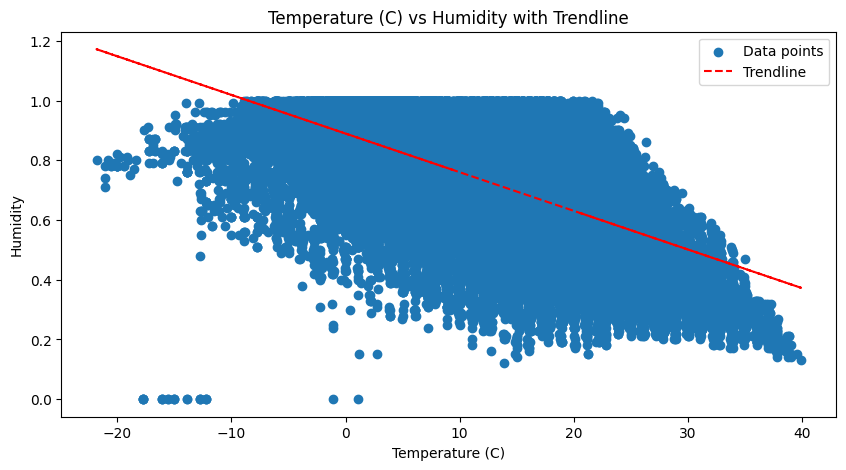


Box plot of 'Wind Speed (km/h)'
This graph shows the distribution of wind speed values in the dataset. The box in the middle of the plot represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). The line in the middle of the box is the median (50th percentile). The “whiskers” extending from the box represent the range of the data within 1.5 times the IQR. Outliers, if any, are represented as individual points outside the whiskers. This gives you a good idea of the spread and skewness of the wind speed data.


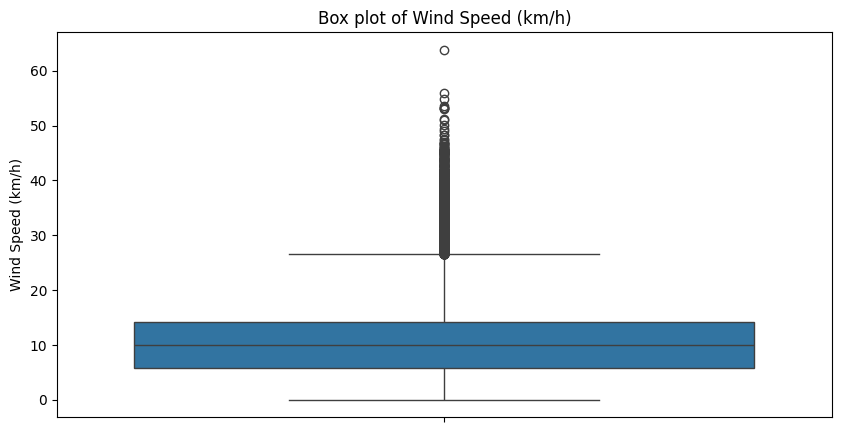


Bar plot of 'Precip Type'
This graph shows the frequency of each type of precipitation in the dataset. The x-axis represents the different types of precipitation and the y-axis represents the frequency of each type. Each bar represents a type of precipitation, and the height of the bar represents the number of times that type of precipitation appears in the dataset. This can give you an idea of the most common types of precipitation in the dataset.


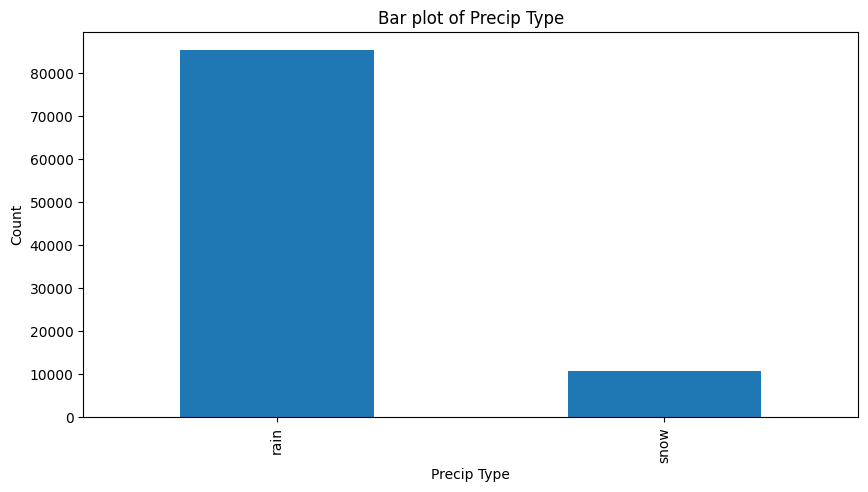

<Axes: >

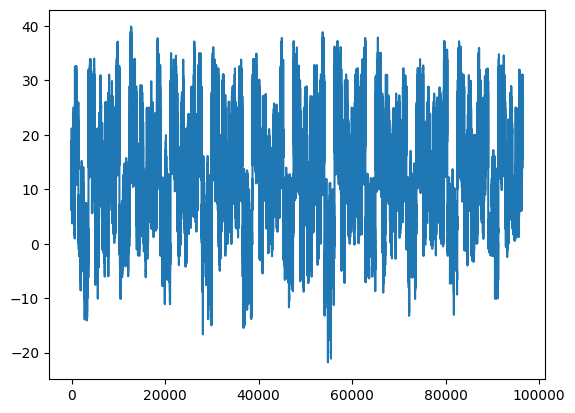

In [8]:
# (6) Use of tables, visualizations/graphics for data exploration
print("\nUse of tables, visualizations/graphics for data exploration")
# Plot a histogram of the temperatures
df['Temperature (C)'].hist()
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

# (2) Histogram of 'Humidity'
print("\nHistogram of 'Humidity'")
print("This graph shows the distribution of humidity values in the dataset. The x-axis represents different ranges of humidity and the y-axis represents the frequency of data points that fall within each range. Each bar in the histogram represents a range of humidity values (also known as a bin), and the height of the bar represents the number of data points that fall within that range. This can give you an idea of the most common humidity values in the dataset.")
plt.figure(figsize=(10, 5))
df['Humidity'].hist(bins=30)
plt.title('Histogram of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

# (3) Scatter plot of 'Temperature (C)' vs 'Humidity'
print("\nScatter plot of 'Temperature (C)' vs 'Humidity'")
print("This graph shows the relationship between temperature and humidity. Each point on the graph represents a data point in the dataset, with its x-coordinate being its temperature and its y-coordinate being its humidity. If there is a pattern in the points (for example, if they tend to go up and to the right), it suggests a correlation between temperature and humidity.")
# Your existing code for the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df['Temperature (C)'], df['Humidity'], label='Data points')

# Calculate the trendline
z = np.polyfit(df['Temperature (C)'], df['Humidity'], 1)
p = np.poly1d(z)

# Add the trendline to the plot
plt.plot(df['Temperature (C)'], p(df['Temperature (C)']), "r--", label='Trendline')

# Add labels and title
plt.title('Temperature (C) vs Humidity with Trendline')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

# (4) Box plot of 'Wind Speed (km/h)'
print("\nBox plot of 'Wind Speed (km/h)'")
print("This graph shows the distribution of wind speed values in the dataset. The box in the middle of the plot represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). The line in the middle of the box is the median (50th percentile). The “whiskers” extending from the box represent the range of the data within 1.5 times the IQR. Outliers, if any, are represented as individual points outside the whiskers. This gives you a good idea of the spread and skewness of the wind speed data.")
plt.figure(figsize=(10, 5))
sns.boxplot(df['Wind Speed (km/h)'])
plt.title('Box plot of Wind Speed (km/h)')
plt.show()

# (5) Bar plot of 'Precip Type'
print("\nBar plot of 'Precip Type'")
print("This graph shows the frequency of each type of precipitation in the dataset. The x-axis represents the different types of precipitation and the y-axis represents the frequency of each type. Each bar represents a type of precipitation, and the height of the bar represents the number of times that type of precipitation appears in the dataset. This can give you an idea of the most common types of precipitation in the dataset.")
plt.figure(figsize=(10, 5))
df['Precip Type'].value_counts().plot(kind='bar')
plt.title('Bar plot of Precip Type')
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.show()

# (5) Bar plot of 'Temperature (C)' by 'Precip Type'
df['Temperature (C)'].plot(label='Temperature (C)')

In [9]:
from scipy import stats

# (7) Integration of a statistical analyses
print("\nIntegration of a statistical analyses")
# Calculate the correlation between Temperature and Humidity
corr, p_value = pearsonr(df['Temperature (C)'], df['Humidity'])
print(f"The correlation between Temperature and Humidity is {corr} with a p-value of {p_value}.")

# Convert the first 5 rows of the DataFrame to a table
table = tabulate(df.head(), headers='keys', tablefmt='psql')

print(table)

print("\nLists of columns and their values:")
# Extract unique non-numeric values from each column
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"\nColumn: {column}")
        print(f"Unique non-numeric values: {unique_values}")

plt.figure(figsize=(10, 5))

correlation_coefficient, p_value = stats.pearsonr(df['Temperature (C)'], df['Humidity'])

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The correlation between temperature and humidity is statistically significant.")
else:
    print("The correlation between temperature and humidity is not statistically significant.")

# Perform a descriptive statistical analysis on temperature
temperature_stats = df['Temperature (C)'].describe()
print("\nDescriptive statistics for temperature:")
print(temperature_stats)

# Perform a t-test to see if the mean temperature differs significantly from a known value
# For example, let's test if the mean temperature is significantly different from 10 degrees Celsius
t_stat, p_value = stats.ttest_1samp(df['Temperature (C)'], 10)
print(f"\nT-test for mean temperature being different from 10°C:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")    


Integration of a statistical analyses
The correlation between Temperature and Humidity is -0.6322546750277986 with a p-value of 0.0.
+----+---------------------+---------------+---------------+-------------------+----------------------------+------------+---------------------+--------------------------+-------------------+--------------+------------------------+-----------------------------------+
|    | Formatted Date      | Summary       | Precip Type   |   Temperature (C) |   Apparent Temperature (C) |   Humidity |   Wind Speed (km/h) |   Wind Bearing (degrees) |   Visibility (km) |   Loud Cover |   Pressure (millibars) | Daily Summary                     |
|----+---------------------+---------------+---------------+-------------------+----------------------------+------------+---------------------+--------------------------+-------------------+--------------+------------------------+-----------------------------------|
|  0 | 2006-04-01 00:00:00 | Partly Cloudy | rain          |  

<Figure size 1000x500 with 0 Axes>


Advanced: Predicting Temperature from Humidity using Linear Regression


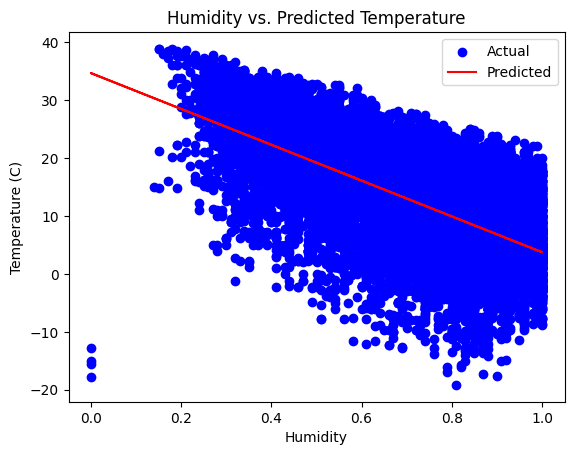

Coefficient: -30.910121502113885
Intercept: 34.654746437132644
Predicted temperature for humidity level 0.5: 19.20°C


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Use of machine learning for advanced data analysis
print("\nAdvanced: Predicting Temperature from Humidity using Linear Regression")

# Prepare the features (X) and target (y)
X = df[['Humidity']]  # Features (in this case, just humidity)
y = df['Temperature (C)']  # Target (temperature)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict temperatures for the testing set
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linestyle='-', label='Predicted')
plt.title('Humidity vs. Predicted Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

# Print the model's coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predict the temperature for a given humidity level
humidity_level = 0.5  # Example humidity level
predicted_temperature = model.predict([[humidity_level]])[0]
print(f"Predicted temperature for humidity level {humidity_level}: {predicted_temperature:.2f}°C")
